In [422]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### build a model to predict the purchase amount of customer agaist the products which will help them to create personalized offer for customer against different products

In [424]:
df_train = pd.read_csv(r"C:\Users\HP\Downloads\archive (4)\train.csv")
df_train.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [425]:
# import the test data: we have to combined both the data set
df_test = pd.read_csv(r"C:\Users\HP\Downloads\archive (4)\test.csv")
df_test.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
5,1000013,P00350442,M,46-50,1,C,3,1,2,3.0,15.0
6,1000013,P00155442,M,46-50,1,C,3,1,1,11.0,15.0
7,1000013,P0094542,M,46-50,1,C,3,1,2,4.0,9.0
8,1000015,P00161842,M,26-35,7,A,1,0,10,13.0,16.0
9,1000022,P00067942,M,18-25,15,A,4+,0,5,14.0,NaN


In [426]:
# Merge both train and test data using pd.concat
df = pd.concat([df_train, df_test], ignore_index=True)
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [428]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [429]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [430]:
# drop user id
df.drop(["User_ID"],axis = 1,inplace = True)

In [431]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [432]:
pd.get_dummies(df["Gender"])

,F,M
0,True,False
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
783662,True,False
783663,True,False
783664,True,False
783665,True,False


In [433]:
# Handling categorical feature Gender
df["Gender"] = df["Gender"].map({"F":0,"M":1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [434]:
#  handle categorical feature age
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [435]:
df["Age"] = df["Age"].map({"0-17":1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7}) 

In [436]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [437]:
# fixing categorical City_Category
df_city = pd.get_dummies(df["City_Category"],drop_first = True)

In [438]:
df_city.head()

,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True


In [439]:
df = pd.concat([df,df_city],axis = 1)
df.head(10)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,False,True
5,P00193542,1,3,15,A,3,0,1,2.0,NaN,15227.0,False,False
6,P00184942,1,5,7,B,2,1,1,8.0,17.0,19215.0,True,False
7,P00346142,1,5,7,B,2,1,1,15.0,NaN,15854.0,True,False
8,P0097242,1,5,7,B,2,1,1,16.0,NaN,15686.0,True,False
9,P00274942,1,3,20,A,1,1,8,NaN,NaN,7871.0,False,False


In [440]:
# drop city_category
df.drop("City_Category",axis =  1,inplace = True)

In [441]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,False,True


In [442]:
# df["Age"] = df["Age"].astype("int")

In [443]:
#  missing values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [444]:
# # focous on replacing missing values
df["Product_Category_2"].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [445]:
df["Product_Category_2"].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [446]:
## replaace the missing values with mode
df["Product_Category_3"] = df["Product_Category_3"].fillna(df["Product_Category_3"])

In [447]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,False,True


In [448]:
df.shape

(783667, 12)

In [449]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [450]:
df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].str.replace("+","")

In [451]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,1,7,16,4,0,8,NaN,NaN,7969.0,False,True


In [452]:
df["B"] = df["B"].map({"False":0,"True":1})
df["C"] = df["C"].map({"False":0,"True":1})

df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,NaN,NaN
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,NaN,NaN
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,NaN,NaN
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,NaN,NaN
4,P00285442,1,7,16,4,0,8,NaN,NaN,7969.0,NaN,NaN


In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          537685 non-null  float64
 8   Product_Category_3          237858 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           0 non-null       float64
 11  C                           0 non-null       float64
dtypes: float64(5), int64(5), object(2)
memory usage: 71.7+ MB


In [454]:
# convert object into int
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          537685 non-null  float64
 8   Product_Category_3          237858 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           0 non-null       float64
 11  C                           0 non-null       float64
dtypes: float64(5), int32(1), int64(5), object(1)
memory usage: 68.8+ MB


In [466]:
df["B"] = df["B"].fillna(0).astype(int)
df["C"] = df["C"].fillna(0).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          537685 non-null  float64
 8   Product_Category_3          237858 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 62.8+ MB


In [456]:
# visualization

<Axes: xlabel='Age', ylabel='Purchase'>

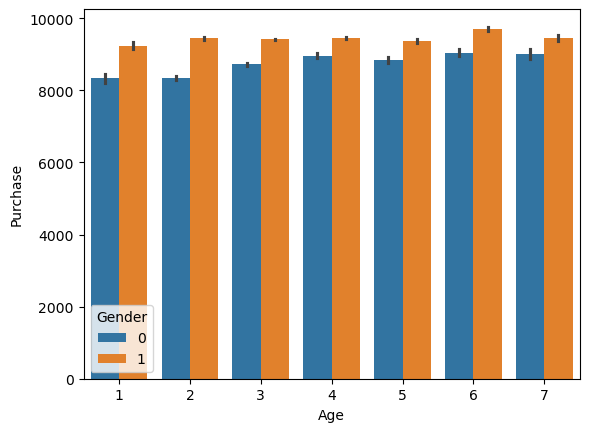

In [468]:
sns.barplot(x = "Age",y = "Purchase",data = df,hue = "Gender")

## purchasing of men is higher than women

<Axes: xlabel='Occupation', ylabel='Purchase'>

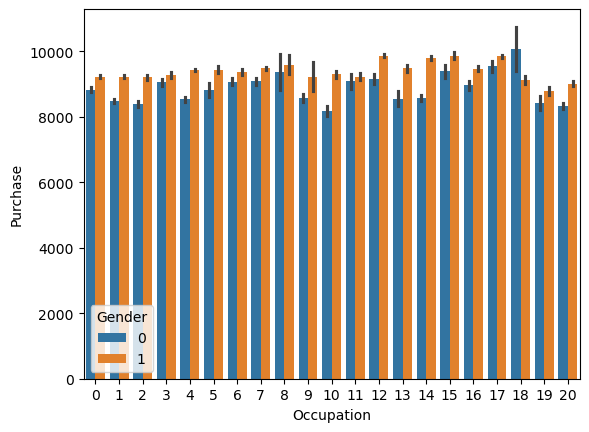

In [473]:
# visualization of purchase with occupation
sns.barplot(x = "Occupation",y = "Purchase",data = df,hue = "Gender")

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

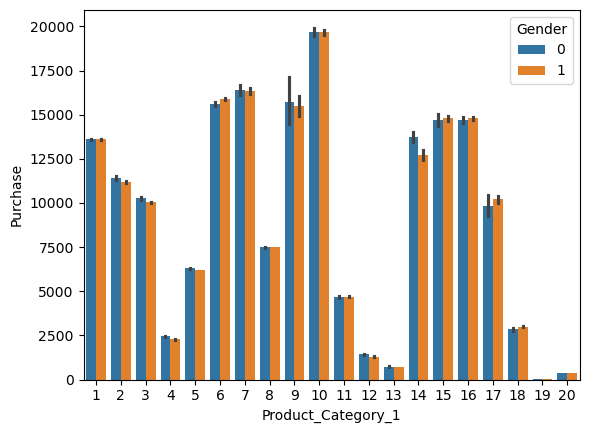

In [475]:
sns.barplot(x = "Product_Category_1",y = "Purchase",data = df,hue = "Gender")

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

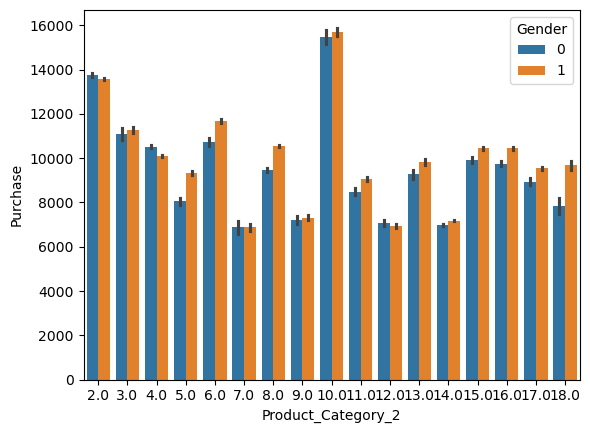

In [477]:
sns.barplot(x = "Product_Category_2",y = "Purchase",data = df,hue = "Gender")

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

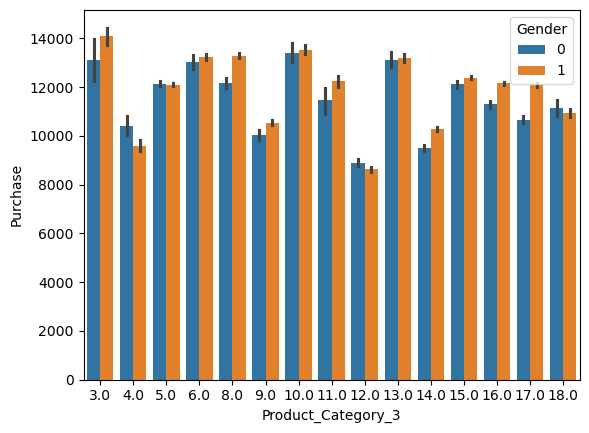

In [479]:
sns.barplot(x = "Product_Category_3",y = "Purchase",data = df,hue = "Gender")